# Aprendizaje Automatico Supervisado - Exploración y Comparación de Algoritmos

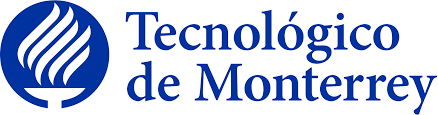


## **Evidencia 1: Proyecto de Minería de datos**

* **Adrian Mateos Garza | A01722496**
* **Santiago Juárez Roaro | A01705439**
* **Antonio Pena Lozano | A01722688**
* **Miguel Angel González | A01198604**

* **15 de Junio del 2024**

* **Modelación del aprendizaje con inteligencia artificial**
* **Eduardo Héctor Ramírez Rangel**



### Objetivo:

- Objetivo principal: implementar algoritmos básicos de aprendizaje supervisado desde cero para obtener conocimientos fundamentales.
- Objetivo secundario: comparar el rendimiento de algoritmos autoimplementados con implementaciones optimizadas de scikit-learn.

### Pasos a realizar:

- **Descripcion de los Datos:** \\
Características: Incluye atributos como edad, sexo, peso, consumo de alcohol, nivel de actividad fisica, y más. \\
Variable objetivo:Es una variable categórica que indica la gravedad del sobrepeso del individuo. \\
Para comenzar a trabajar con el análisis, se optó por elegir una base de datos del paquete UCI Machine Learning Repository (ucimlrepo). La base de datos seleccionada se llama Estimation of Obesity Levels Based On Eating Habits and Physical Condition, la cual recopila cerca de 2,000 instancias empleando 16 features sobre personas de México, Perú y Colombia, recopilando información sobre sus hábitos alimenticios y condición física, permitiendo su manejo para encontrar patrones en gente que sufre de obesidad (Mendoza Palechor, De la Hoz Manotas, 2019).
Dentro de este dataset, se recopilan variables numéricas, continuas, binarias y categóricas. Es necesario revisar el diccionario de variables, ya que a simple vista es complejo de intuir lo que refieren columnas como FAVC (si habitúan cosumir comida alta en calorías; binaria, respuesta de sí o no), CH20 (con qué frecuencia beben agua a diario; continua, en una escala de 1 a 3), o MTRANS (medio de transporte más usado; categórica).


- **Preprocesamiento de Datos:**
Carga del conjunto de datos y exploracion de sus características básicas.
Realizacion de pasos de preprocesamiento necesarios, como manejar valores faltantes, codificar variables categóricas y escalar funciones.

- **Construccion de Modelos** \
Se implementaran los siguientes algoritmos: \
`Arboles de Decision` \\
`Regresion Logistica` \\
`K vecinos más próximos (KNN)` \\
`Máquinas de vectores de soporte(SVM)` \\


- **Evaluación de modelos:**
Dividir los datos en conjuntos de entrenamiento y prueba.
Entrenar cada modelo con los datos de entrenamiento.
Evalúar cada modelo con los datos de prueba utilizando métricas relevantes como exactitud, precisión, recuperación y puntuación F1.
\\

- **Comparacion de modelos:**
Comparacion del rendimiento de los modelos en función de las métricas.\\

- **Reflexion:**
Analizar cual fue el modelo qué funcionó mejor y plantear la hipótesis de por qué podría ser así. Reflexionar sobre el desempeño del método conjunto en comparación con los modelos individuales.

## Seccion 1

Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
import seaborn as sns
import numpy as np

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

obesity = fetch_ucirepo(id=544)

X = obesity.data.features
y = obesity.data.targets

In [ ]:
#list_available_datasets()

In [ ]:
# Concatenar variables dependientes e independientes en un mismo dataframe
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# Guardar el df en un csv, exluyendo el index
df.to_csv('dataset.csv', index=False)


## Sección 2: Exploración y carga de datos

In [ ]:
# Cargar datset
dataset = pd.read_csv('/content/dataset.csv')

In [ ]:
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Exploración
dataset.shape

(2111, 17)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
dataset.describe(include=['float64'])

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
dataset.describe(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [ ]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Section 3: Preprocesamiento de datos

In [ ]:
dataset.isnull().sum() #No hay valores nulos

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

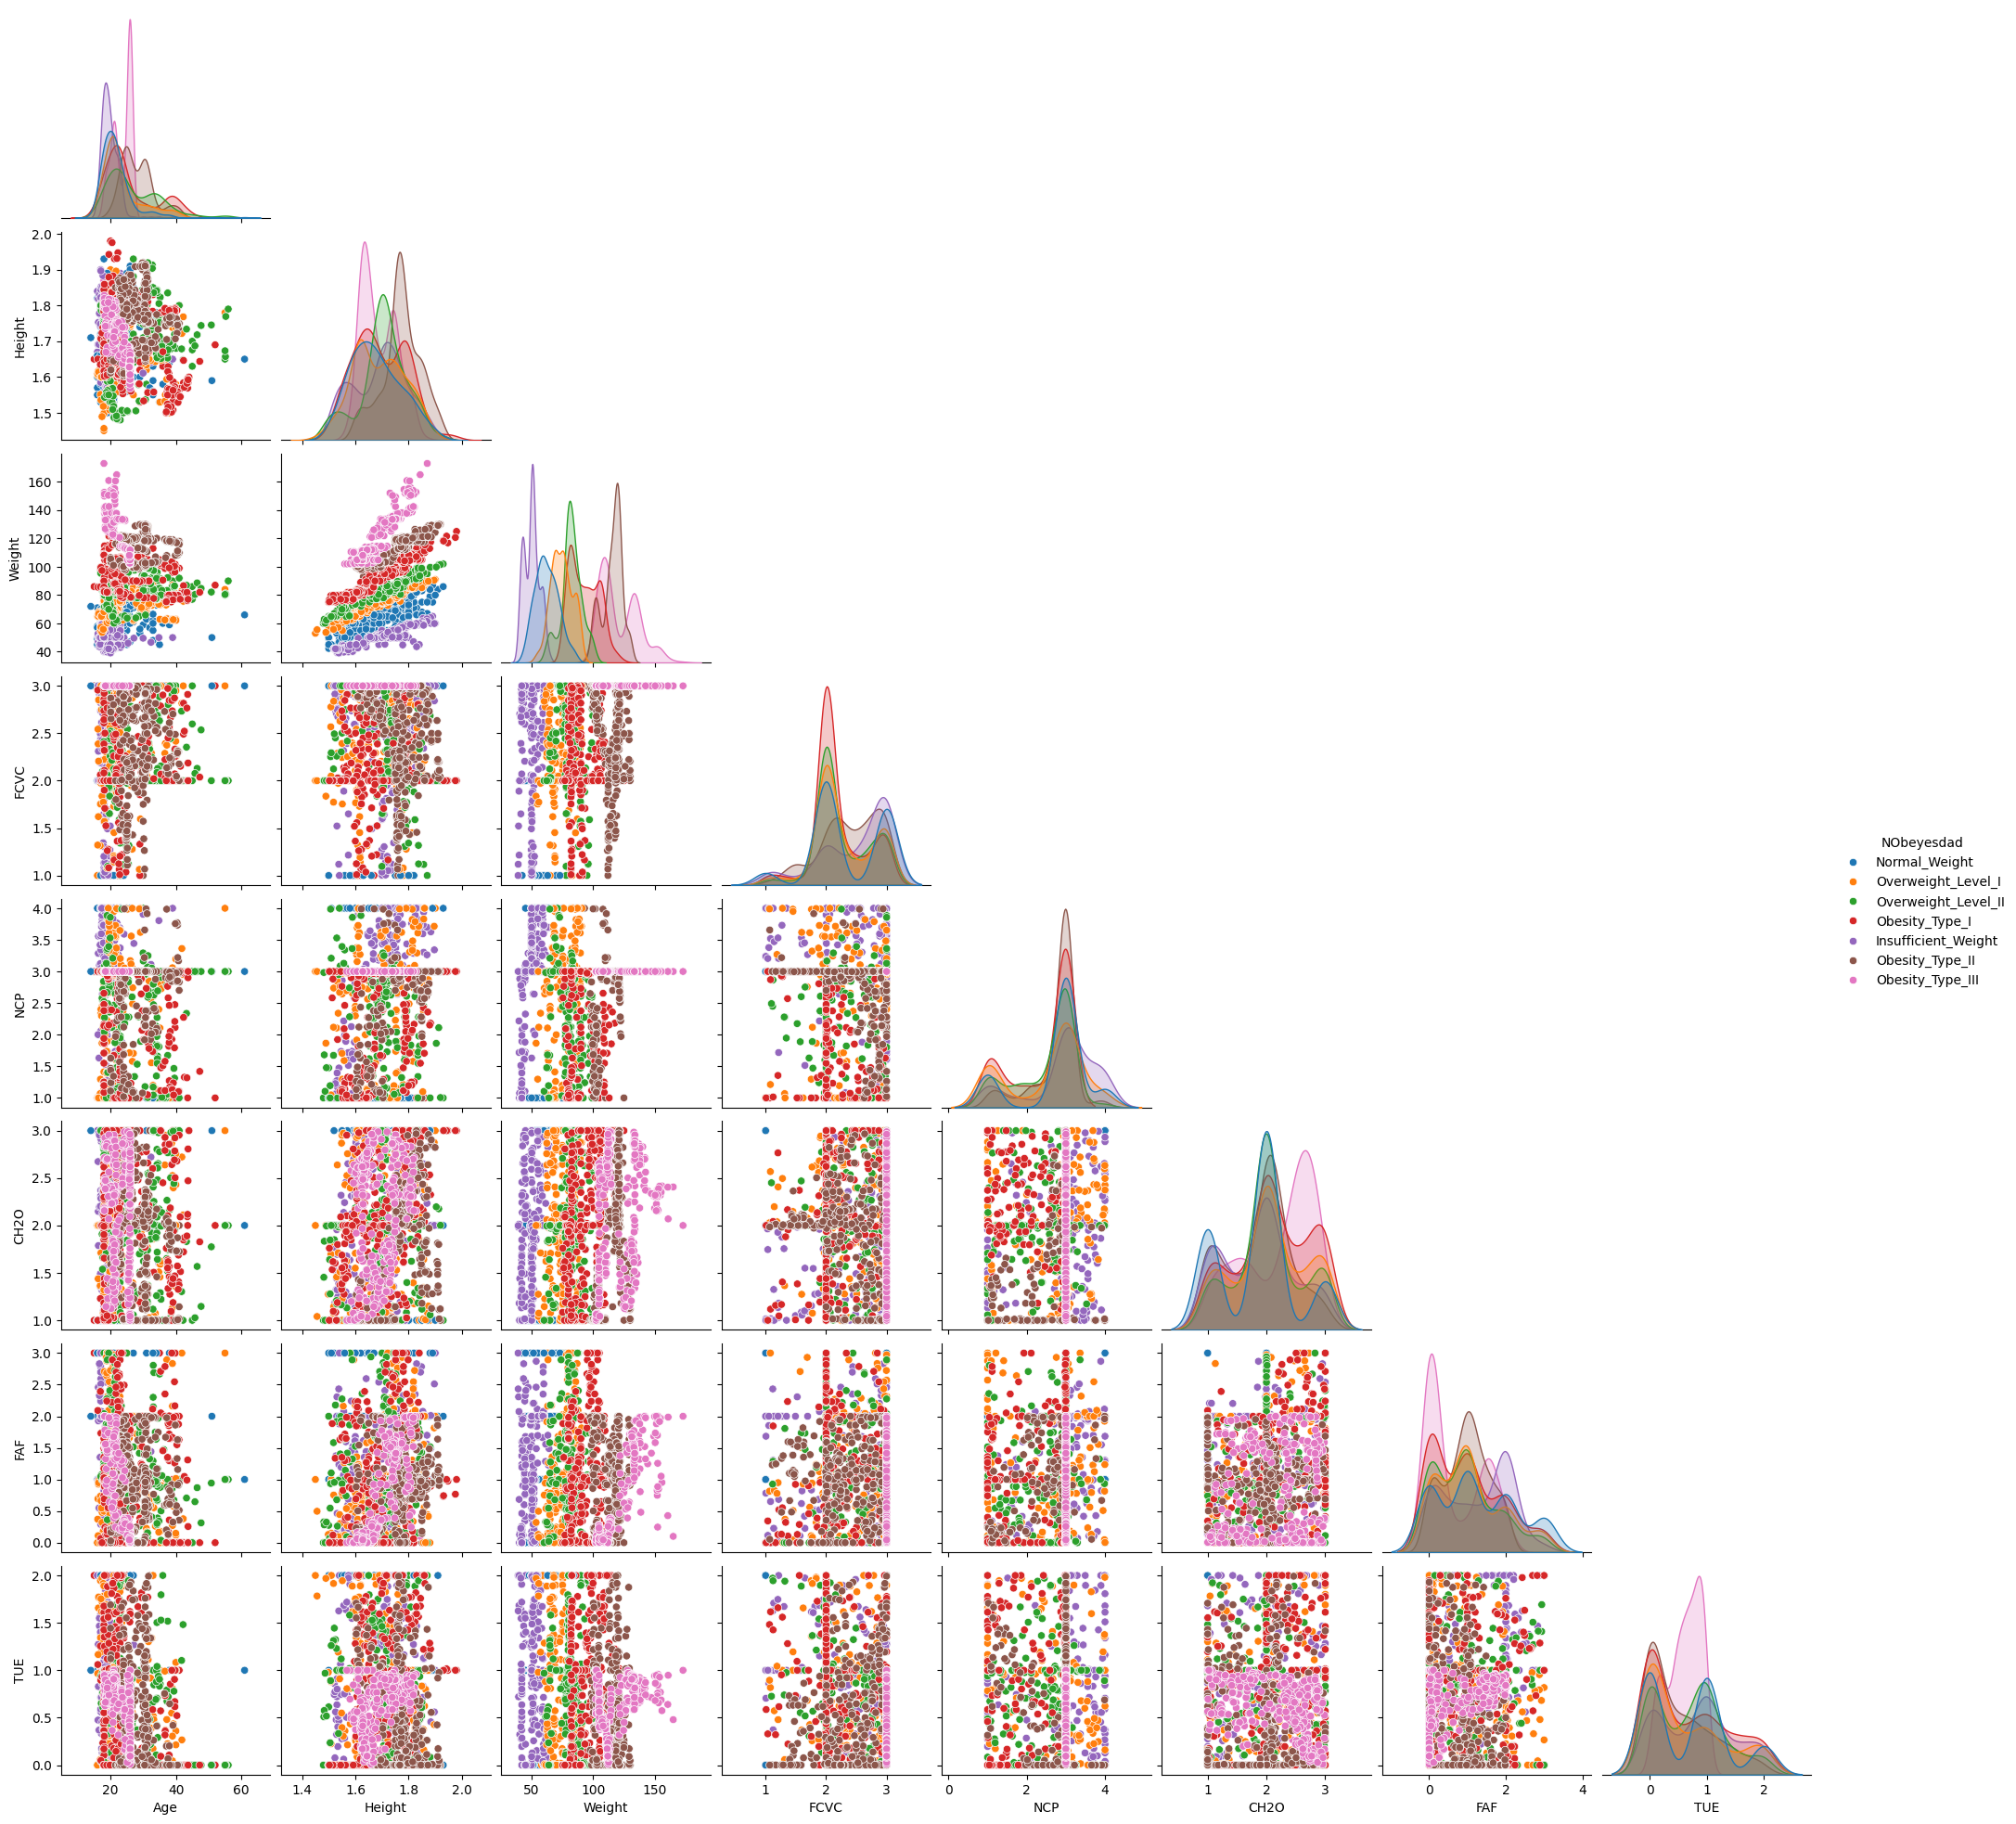

In [ ]:
sns.pairplot(dataset,hue='NObeyesdad',corner=True)

In [ ]:
data=dataset

### Encodings


In [ ]:
#Encoding de Gender
encoder=OneHotEncoder()
gender_encoder=encoder.fit_transform(data[['Gender']]).toarray()
labels=encoder.get_feature_names_out(['Gender'])
df_gender=pd.DataFrame(gender_encoder,columns=labels)
df_gender

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2106,1.0,0.0
2107,1.0,0.0
2108,1.0,0.0
2109,1.0,0.0


In [ ]:
data.drop(columns=['Gender'],inplace=True)
data.insert(loc=0,column='Gender_Female',value=df_gender.iloc[:,0])
data.insert(loc=1,column='Gender_Male',value=df_gender.iloc[:,1])
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Encoding de 'Family_history_with_overweight'
encoder=OrdinalEncoder()
family_encoder=encoder.fit_transform(data[['family_history_with_overweight']])
family_encoder

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
data['family_history_with_overweight'] = family_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# FAVC
### **¿Consumes comida alta en calorías de manera frecuente?**
* Tipo: Binaria
* Encoding:
  * 0 -> no
  * 1 -> sí
  



In [ ]:
#Encoding de 'FAVC'
encoder=OrdinalEncoder()
favc_encoder=encoder.fit_transform(data[['FAVC']])
favc_encoder

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
data['FAVC']=favc_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# CAEC

### **¿Ingieres algún alimento entre comidas?**
* Tipo: categórica
* Encoding:
  * 0 -> no
  * 1 -> sometimes
  * 2 -> frequently
  * 3 -> always

In [ ]:
#Encoding de 'CAEC'
order=[['no','Sometimes','Frequently','Always']]
encoder=OrdinalEncoder(categories=order)
caec_encoder=encoder.fit_transform(data[['CAEC']])
caec_encoder

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
data['CAEC']=caec_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Smoke
### **¿Fumas?**

* Tipo: Binaria
* Encoding:
  * 0 -> no
  * 1 -> sí

In [ ]:
#Encoder de 'Smoke'
order=[['no','yes']]
encoder=OrdinalEncoder(categories=order)
smoke_encoder=encoder.fit_transform(data[['SMOKE']])
smoke_encoder

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
data['SMOKE']=smoke_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# SCC
### **¿Llevas un control de las calorías que ingieres diariamente?**
* Tipo: Binaria
* Encoding:
  * 0 -> no
  * 1 -> sí

In [ ]:
#Encoder de 'SCC'
order=[['no','yes']]
encoder=OrdinalEncoder(categories=order)
scc_encoder=encoder.fit_transform(data[['SCC']])
scc_encoder

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
data['SCC']=scc_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,3.000000,1.0,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,2.000000,0.0,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,1.728139,0.0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,2.005130,0.0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,2.054193,0.0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,2.852339,0.0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# CALC
### **¿Qué tan seguido bebes alcohol?**
* Tipo: Categórica
* Encoding:
  * 0 -> no
  * 1 -> sometimes
  * 2 -> frequently
  * 3 -> always

In [ ]:
#Encoder de 'CALC'
order=[['no','Sometimes','Frequently','Always']]
encoder=OrdinalEncoder(categories=order)
calc_encoder=encoder.fit_transform(data[['CALC']])
calc_encoder

array([[0.],
       [1.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
data['CALC']=calc_encoder
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,0.000000,1.000000,0.0,Public_Transportation,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,1.0,3.000000,1.0,3.000000,0.000000,1.0,Public_Transportation,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,0.0,2.000000,0.0,2.000000,1.000000,2.0,Public_Transportation,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,0.0,2.000000,0.0,2.000000,0.000000,2.0,Walking,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,0.0,2.000000,0.0,0.000000,0.000000,1.0,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,0.0,1.728139,0.0,1.676269,0.906247,1.0,Public_Transportation,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,0.0,2.005130,0.0,1.341390,0.599270,1.0,Public_Transportation,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,0.0,2.054193,0.0,1.414209,0.646288,1.0,Public_Transportation,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,0.0,2.852339,0.0,1.139107,0.586035,1.0,Public_Transportation,Obesity_Type_III


# MTRANS

### **¿Qué medio de transporte sueles usar?**

In [ ]:
#MTRANS ENCODING
encoder=OneHotEncoder()
mtrans_encoder=encoder.fit_transform(data[['MTRANS']]).toarray()
df_mtrans_encoder=pd.DataFrame(mtrans_encoder,columns=encoder.get_feature_names_out(['MTRANS']))
df_mtrans_encoder


,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [ ]:
data.drop(columns=['MTRANS'],inplace=True)
data.insert(loc=16,column='MTRANS_Automobile',value=df_mtrans_encoder.iloc[:,0])
data.insert(loc=17,column='MTRANS_Bike',value=df_mtrans_encoder.iloc[:,1])
data.insert(loc=18,column='MTRANS_Motorbike',value=df_mtrans_encoder.iloc[:,2])
data.insert(loc=19,column='MTRANS_Public_Transport',value=df_mtrans_encoder.iloc[:,3])
data.insert(loc=20,column='MTRANS_Walking',value=df_mtrans_encoder.iloc[:,4])
data

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking,NObeyesdad
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,...,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,...,1.0,3.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,...,0.0,2.000000,1.000000,2.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,...,0.0,2.000000,0.000000,2.0,0.0,0.0,0.0,0.0,1.0,Overweight_Level_I
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,...,0.0,1.676269,0.906247,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,...,0.0,1.341390,0.599270,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,...,0.0,1.414209,0.646288,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,...,0.0,1.139107,0.586035,1.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III


In [ ]:
# Variables predictoras
X=data.iloc[:,:21]
X

,Gender_Female,Gender_Male,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking
0,1.0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,1.0,...,2.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,1.0,...,3.000000,1.0,3.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,1.0,...,2.000000,0.0,2.000000,1.000000,2.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,1.0,...,2.000000,0.0,2.000000,0.000000,2.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,1.0,...,2.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,1.0,...,1.728139,0.0,1.676269,0.906247,1.0,0.0,0.0,0.0,1.0,0.0
2107,1.0,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,1.0,...,2.005130,0.0,1.341390,0.599270,1.0,0.0,0.0,0.0,1.0,0.0
2108,1.0,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,1.0,...,2.054193,0.0,1.414209,0.646288,1.0,0.0,0.0,0.0,1.0,0.0
2109,1.0,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,1.0,...,2.852339,0.0,1.139107,0.586035,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Variable Objetivo
y = data.iloc[:,-1]
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [ ]:
#Encoding de Variable Objetivo
order=[['Insufficient_Weight','Normal','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II']]
encoder = OrdinalEncoder()
y_encoder = encoder.fit_transform(y.to_numpy().reshape(-1,1))
y_encoder
y_encoder=y_encoder.reshape(-1)

y = pd.Series(y_encoder)

y

0       1.0
1       1.0
2       1.0
3       5.0
4       6.0
       ... 
2106    4.0
2107    4.0
2108    4.0
2109    4.0
2110    4.0
Length: 2111, dtype: float64

**Significado de Variable Objetivo**\
'Insufficient_Weight' = 0\
'Normal' = 1\
'Obesity_Type_I' = 2\
'Obesity_Type_II' = 3\
'Obesity_Type_III' = 4\
'Overweight_Level_I' = 5\
'Overweight_Level_II' = 6

In [ ]:
#databi.to_csv('databi.csv',index=False)
#databi=pd.concat([X,y],axis=1)

# Split de Entrenamiento-Prueba


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escala de variables predictoras NUMERICAS
numeric_cols = ['Age', 'Height', 'Weight', 'FAF', 'TUE']

X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

X_train_categoric = X_train.drop(columns=numeric_cols)
X_test_categoric = X_test.drop(columns=numeric_cols)

scaler = StandardScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
X_test_numeric_scaled = scaler.transform(X_test_numeric)

X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=numeric_cols, index = X_train.index)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=numeric_cols, index = X_test.index)

In [ ]:
X_train = pd.concat([X_train_numeric_scaled, X_train_categoric], axis = 1)
X_test = pd.concat([X_test_numeric_scaled, X_test_categoric], axis=1)

X_train

,Age,Height,Weight,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking
162,-0.532646,-0.768029,-1.019413,1.186213,-1.069472,1.0,0.0,1.0,1.0,3.000000,...,3.0,1.0,2.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2001,-0.544235,0.546078,1.802127,0.567871,0.224537,1.0,0.0,1.0,1.0,3.000000,...,1.0,0.0,2.887659,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1435,-0.239258,-0.427896,-0.153398,-1.043353,1.684843,1.0,0.0,1.0,1.0,1.203754,...,1.0,0.0,2.765593,0.0,1.0,0.0,0.0,0.0,1.0,0.0
649,-0.403229,-1.217973,-1.623588,0.112755,-1.069472,1.0,0.0,0.0,0.0,3.000000,...,2.0,0.0,2.550307,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1280,0.238722,1.179597,0.745216,0.963833,0.059515,0.0,1.0,1.0,1.0,3.000000,...,1.0,0.0,2.858171,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.210959,0.572086,1.283958,-0.058240,1.153318,0.0,1.0,1.0,1.0,2.967300,...,1.0,0.0,2.530035,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1095,-0.223774,0.186265,-0.188882,-0.138521,0.610167,0.0,1.0,1.0,1.0,2.000000,...,1.0,0.0,1.400247,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1130,-0.225342,-0.553536,-0.252885,-1.021224,2.250028,1.0,0.0,1.0,1.0,2.000000,...,1.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,-0.223774,-0.787677,-0.080494,-0.182435,-0.022392,1.0,0.0,1.0,1.0,2.058687,...,1.0,0.0,2.010596,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test

,Age,Height,Weight,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight,FAVC,FCVC,...,CAEC,SMOKE,CH2O,SCC,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transport,MTRANS_Walking
544,-0.624246,0.583046,-1.260886,2.222730,2.250028,1.0,0.0,1.0,1.0,2.000000,...,2.0,0.0,1.863930,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1987,0.239533,-0.822189,0.935422,-1.196238,-0.533927,1.0,0.0,1.0,1.0,3.000000,...,1.0,0.0,2.704315,0.0,1.0,0.0,0.0,0.0,1.0,0.0
420,-0.995953,1.591404,-1.019413,1.186213,-1.069472,0.0,1.0,1.0,1.0,3.000000,...,1.0,0.0,2.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0
527,-0.532646,-1.947746,-1.709288,-1.196238,-1.069472,1.0,0.0,0.0,1.0,3.000000,...,2.0,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
196,-0.378210,0.518934,-0.482843,-0.005012,2.250028,0.0,1.0,1.0,0.0,2.000000,...,1.0,0.0,2.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.841518,1.055169,0.015400,1.186213,0.590278,0.0,1.0,1.0,1.0,2.000000,...,1.0,0.0,2.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1793,0.967723,-0.551509,0.557384,1.055103,-0.440729,0.0,1.0,1.0,1.0,2.913452,...,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,-0.841518,1.591404,-0.827781,1.186213,0.590278,0.0,1.0,1.0,0.0,2.000000,...,1.0,0.0,3.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1711,0.700715,0.611359,1.031109,-1.196238,1.362857,0.0,1.0,1.0,1.0,2.320201,...,1.0,0.0,2.164784,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Revisar media de 0 y desviacion estandar de 1
print(round(X_train['Age'].mean()))
print(round(X_train['Age'].std()))

print(round(X_test['Weight'].mean()))
print(round(X_test['Weight'].std()))

0
1
0
1


In [ ]:
# Convertir variable objetivo en binaria para comparar resultados vs cuando no es binaria
# Valores de 0 & 1 ('underweight' and 'normal_weight') seran 0, todos los otros valores seran 1.
y_train_binary = y_train.apply(lambda x:0 if x == 0 or x == 1 else 1)
y_test_binary = y_test.apply(lambda x:0 if x == 0 or x == 1 else 1)

y_train_binary

162     0
2001    1
1435    1
649     0
1280    1
       ..
1638    1
1095    1
1130    1
1294    1
860     1
Length: 1688, dtype: int64

## Seccion 4: Implementacion de los Modelos - DESDE CERO

In [ ]:
# a) Implementacion de arboles de decision
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini(self, y):
        # Cálculo del índice de Gini
        m = len(y)
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in np.unique(y))

    def information_gain(self, y, y_left, y_right):
        # Cálculo de la ganancia de información
        p = float(len(y_left)) / len(y)
        return self.gini(y) - p * self.gini(y_left) - (1 - p) * self.gini(y_right)

    def split(self, X, y, index, value):
        # División de los datos en base a un índice de característica y un valor de umbral
        left_mask = X.iloc[:, index] < value
        right_mask = X.iloc[:, index] >= value
        return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

    def fit(self, X, y):
        # Construcción del árbol de decisión
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples <= 1 or (self.max_depth and depth >= self.max_depth):
            return y.mode()[0]

        # Encuentra la mejor división
        best_index, best_value, best_gain = None, None, -1
        for index in range(num_features):
            values = X.iloc[:, index].unique()
            for value in values:
                X_left, X_right, y_left, y_right = self.split(X, y, index, value)
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                gain = self.information_gain(y, y_left, y_right)
                if gain > best_gain:
                    best_gain = gain
                    best_index = index
                    best_value = value

        if best_gain == -1:
            return y.mode()[0]

        X_left, X_right, y_left, y_right = self.split(X, y, best_index, best_value)
        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)
        return (best_index, best_value, left_subtree, right_subtree)

    def predict(self, X):
        # Predicción para cada muestra en X
        predictions = [self._predict(inputs) for _, inputs in X.iterrows()]
        return pd.DataFrame(predictions, index=X.index, columns=['prediction'])

    def _predict(self, inputs):
        node = self.tree
        while isinstance(node, tuple):
            index, value, left, right = node
            if inputs.iloc[index] < value:
                node = left
            else:
                node = right
        return node

In [ ]:
# Inicialización y ajuste del clasificador
dt_model = MyDecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train_binary)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt.index = y_test_binary.index
results = pd.concat([y_test_binary, y_pred_dt], axis=1)

results.columns = ['y_test','y_pred_dt']
results

,y_test,y_pred_dt
544,0,0
1987,1,1
420,0,0
527,0,0
196,0,0
...,...,...
447,1,1
1793,1,1
73,0,0
1711,1,1


In [ ]:
# Evaluación del modelo
gini_index = dt_model.gini(y_test_binary)
print(f"Gini Index: {gini_index.round(3)}")

accuracy = accuracy_score(y_test_binary, y_pred_dt)
print(f"Accuracy: {accuracy.round(3)}")

Gini Index: 0.402
Accuracy: 0.957


In [ ]:
# Implementacion de regresion logistica

class MyLogisticRegression:

  #Parámetros de inicio
  def __init__(self, learning_rate=0.01, num_iterations=1000,tresh=0.5):
    self.tresh = tresh
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.weights = None
    self.bias = None

  #Función Sigmoidal
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  #Entrenamiento
  def fit(self, X, y):
    num_samples, num_features = X.shape

    # Inicialización de parámetros
    self.weights = np.zeros(num_features)
    self.bias = 0

    # Gradiente descendente para optimizar los parámetros
    for _ in range(self.num_iterations):
        # Modelo lineal
        linear_model = np.dot(X, self.weights) + self.bias
        # Predicción con la función sigmoidal
        y_predicted = self.sigmoid(linear_model)

        # Cálculo de los gradientes
        dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
        db = (1 / num_samples) * np.sum(y_predicted - y)

        # Actualización de los parámetros = peso - rate * gradiente / bias - rate * gradiente
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

  #Predicciones
  def predict(self, X):
    linear_model = np.dot(X, self.weights) + self.bias
    y_predicted = self.sigmoid(linear_model)
    y_predicted_cls = [1 if i > self.tresh else 0 for i in y_predicted]
    return y_predicted_cls

In [ ]:
lr_model = MyLogisticRegression(learning_rate=0.001,num_iterations=10000,tresh=0.45)
lr_model.fit(X_train , y_train_binary)

In [ ]:
y_pred_log = lr_model.predict(X_test)
y_pred_log = pd.Series(y_pred_log, index=y_test_binary.index)
col_results = pd.DataFrame([y_test_binary,y_pred_log]).T
col_results.columns = ['y_test','y_pred']
col_results

,y_test,y_pred
544,0,0
1987,1,1
420,0,0
527,0,0
196,0,1
...,...,...
447,1,1
1793,1,1
73,0,0
1711,1,1


In [ ]:
# Modelo KNN

# Función de distancia euclidiana
def euclidean_distance(x1, x2):
    # Calcula la distancia euclidiana entre dos puntos x1 y x2.
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Implementación del modelo KNN
class MyKNN:
    def __init__(self, k=3):
        # Inicializa el modelo KNN con el número de vecinos k.
        self.k = k

    def fit(self, X, y):
        # Ajusta el modelo KNN con los datos de entrenamiento.
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Predice las etiquetas para el conjunto de datos dado.
        return [self._predict(x) for x in X.values]

    def _predict(self, x):
        # Predice la etiqueta para una sola muestra.
        # Calcula las distancias entre x y todas las muestras de entrenamiento.
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train.values]
        # Obtiene los índices de las k distancias más pequeñas.
        k_indices = np.argsort(distances)[:self.k]
        # Obtiene las etiquetas de los k vecinos más cercanos.
        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
        # Retorna la etiqueta más común entre los vecinos más cercanos.
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [ ]:
# Crear e inicializar el clasificador KNN
knn_model = MyKNN(k=3)
# Entrenar el modelo
knn_model.fit(X_train, y_train)

# Evaluación del modelo
accuracy = accuracy_score(y_test, knn_model.predict(X_test))
print("Accuracy:", accuracy)

Accuracy: 0.8605200945626478


In [ ]:
# Crear e inicializar el clasificador KNN con y como variable categórica
knn_model_categorical = MyKNN(k=3)
knn_model_categorical.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con y como variable categórica
predictions_categorical = knn_model_categorical.predict(X_test)

# Calcular y mostrar la precisión del modelo con y como variable categórica
accuracy_categorical = accuracy_score(y_test, predictions_categorical)
print("Accuracy con y categórica:", accuracy_categorical)

# Crear e inicializar el clasificador KNN con y como variable binaria
knn_model_binary = MyKNN(k=3)
knn_model_binary.fit(X_train, y_train_binary)

# Realizar predicciones en el conjunto de prueba con y como variable binaria
predictions_binary = knn_model_binary.predict(X_test)

# Calcular y mostrar la precisión del modelo con y como variable binaria
accuracy_binary = accuracy_score(y_test_binary, predictions_binary)
print("Accuracy con y binaria", accuracy_binary)


Accuracy con y categórica: 0.8605200945626478
Accuracy con y binaria 0.9290780141843972


In [ ]:
class MySVM:

    #Iniciando hiperparametros
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape #Asumiendo que X & y son arrays de numpy

        y_ = np.where(y <= 0, -1, 1) #asegurar que y sea -1 ó 1
        #y_ = y_.astype(np.float64)

        self.w = np.random.rand(n_features) #Iniciar los pesos con valores al azar
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i, in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                    self.b = self.b # el sesgo no se actualiza dado que el gradiente es 0
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx) #regresa 1 ó -1

In [ ]:
#Hacer el fit del modelo y realizar predicciones en el dataset
svm_model = MySVM(learning_rate=0.001, lambda_param=1, n_iters = 1000)
svm_model.fit(X_train.values, y_train.values)

svm_model_predictions = svm_model.predict(X_test.values)
print("Exactitud: ", round(accuracy_score(y_true = y_test, y_pred = svm_model_predictions),4))

Exactitud:  0.1466


In [ ]:
# Hacer fit nuevamente con variable objetivo binaria
svm_model = MySVM(learning_rate=0.001, lambda_param=1, n_iters = 1000)
svm_model.fit(X_train.values, y_train_binary.values)

svm_model_predictions = svm_model.predict(X_test.values)
print("Exactitud: ", round(accuracy_score(y_true = y_test_binary, y_pred = svm_model_predictions),4))

Exactitud:  0.721


## Comparaciones entre modelos desde 0

In [ ]:
#Calculate and compare accuracy scores for your implemented algorithms

In [ ]:
#Decision Trees
accuracy_dt = accuracy_score(y_test_binary, y_pred_dt)
print(f"Exactitud Árboles de Decisión desde 0: {accuracy_dt.round(3)}")

Exactitud Árboles de Decisión desde 0: 0.957


In [ ]:
# Logisitc Regression
accuracy_lr = accuracy_score(y_test_binary, y_pred_log)
print("Exactitud Regresión Logística desde 0:", accuracy_lr.round(3))

Exactitud Regresión Logística desde 0: 0.915


In [ ]:
#KNN
accuracy_binary = accuracy_score(y_test_binary, predictions_binary)
print("Exactitud KNN desde 0:", accuracy_binary)

Exactitud KNN desde 0: 0.9290780141843972


In [ ]:
# SVM
accuracy_SVM = accuracy_score(y_test_binary, svm_model_predictions)
print("Exactitud SVM desde 0:", accuracy_SVM.round(3))

Exactitud SVM desde 0: 0.721


# Modelos evaluados segun su exactitud:

* 0.957 - Árboles de decisión
* 0.915 - Regresión logística
* 0.929 - KNN
* 0.721 - SVM

## Seccion 5: Comparacion con Scikit-learn

- Implementacion de Modelos - SCIKIT LEARN

In [ ]:
# Arboles de Decision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train_binary)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Regresion Logistica
log_reg = LogisticRegression(random_state=42,max_iter=10000)
log_reg.fit(X_train,y_train_binary)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
# K vecinos proximos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_binary)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Maquinas de vectores de Soporte
from sklearn.svm import SVC
svm = SVC(kernel='linear', C = 1)
svm.fit(X_train,y_train_binary)


SVC(C=1, kernel='linear')

### Prediccion con modelos de sklearn y cálculo de metricas



In [ ]:
#Evaluacion de Modelos
models = [tree, log_reg, knn, svm]
model_names = ["Decision Tree", "Logistic Regression", "KNN", "SVM"]

In [ ]:
pred_dt = tree.predict(X_test)
pred_lr = log_reg.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svm = svm.predict(X_test)

model_preds = [pred_dt, pred_lr, pred_knn, pred_svm]

In [ ]:
accuracy_dt = accuracy_score(y_test_binary, pred_dt)
accuracy_lr = accuracy_score(y_test_binary, pred_lr)
accuracy_knn = accuracy_score(y_test_binary, pred_knn)
accuracy_svm = accuracy_score(y_test_binary, pred_svm)

model_accs = [accuracy_dt, accuracy_lr, accuracy_knn, accuracy_svm]

In [ ]:
# Comparación de modelos
print("Model Comparison Results:")
for model, name in zip(models, model_names):
    print("------------------------------------------------------------")
    y_pred = model_preds[model_names.index(name)]
    accuracy = model_accs[model_names.index(name)]
    print(f"{name} Accuracy: {accuracy:.2f}")
    y_test = y_test_binary
    print(classification_report(y_test, y_pred))


Model Comparison Results:
------------------------------------------------------------
Decision Tree Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       118
           1       0.98      0.98      0.98       305

    accuracy                           0.97       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.97      0.97       423

------------------------------------------------------------
Logistic Regression Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       118
           1       0.98      1.00      0.99       305

    accuracy                           0.98       423
   macro avg       0.98      0.97      0.98       423
weighted avg       0.98      0.98      0.98       423

------------------------------------------------------------
KNN Accuracy: 0.93
              precision    recall  f1-score   support


# Seccion 6: Reporte y Discusión
Prepare un breve informe que resuma: \\
- Hallazgos clave de la exploración de datos.
- Rendimiento de cada modelo.
- Inferencias sobre qué algoritmos funcionan mejor y en qué circunstancias según el conjunto de datos.
Limitaciones de los modelos utilizados.

\\
- Reflexionar sobre los desafíos de construir algoritmos frente al uso de bibliotecas.
- Considerar las compensaciones entre eficiencia y interpretabilidad de los enfoques.

###Hallazgos de la exploración de datos

Durante la exploración de datos se encontró que el dataset era bastante limpio ya que de entrada no habían datos nulos. Ya hablando de los datos como tal, notamos que existe una fuerte correlación entre la altura y el peso como determinantes de obesdiad, ya que a más altura, más peso. Esto causó que las obesidades estuvieran escalonadas en orden desde obesidad tipo 3 hasta el peso insuficiente. También hubo relaciones bastante peculiares ya que por ejemplo en el caso de las personas de obesidad tipo 3 y 2 el 90% compartían la peculiaridad de que tener 3 comidas principales al día mientras que los demás tenían números variados. En general, si se notaban patrones definidos por cada tipo de peso, siendo los de insuficiente peso siempre en los valores mínimos y los de obesidad tipo 3 en los máximos.

### Rendimiento de cada modelo.
En cuanto al rendimiento de cada modelo, los que fueron hechos desde scratch tuvieron un buen rendimiento, ya que todos a excepción del SVM, todos tuvieron un rendimiento arriba del 91. Esto es algo curioso ya que por parte de los modelos de scikit-learn, el más preciso fue el modelo de SVM, con una exactitud del 99. Aun así, todos los modelos de scikit-learn tuvieron una precisión arriba del 92. Esto era algo de esperarse ya que dichos modelos tienen un gran catálogo de parámetros para ajustar los modelos, además te estar hechos de manera casi perfecta, mientras que los construidos por nosotros fueron hechos de manera limitada, ya que por ejemplo, la regresión logisitica clasifica valores de si y no (también se puede hacer una clasificación One to Rest para la clasifiación multinomial pero en nuestro caso fue una regresión logistica simple) y el dataset tuvo que ser adaptado para cumplir dichas condiciones, mientras que los modelos de scikit-learn ya hacen este tipo de modifiaciones dentro de su código.

### Inferencias sobre qué algoritmos funcionan mejor y en qué circunstancias según el conjunto de datos.
Es de esperarse que los modelos hayan funcionado bien ya que el dataset no cuenta con una gran dimensionalidad y se puede notar ciertas relaciones entre las variables, sin embargo, era de esperarse que el SVM fuera el mejor ya que trabaja muy bien cuando se tienen datos con separaciones bien marcadas y como vimos en la exploración de datos, variables como weight y height tenían separaciones bien marcadas e incluso, lineales. En cuanto a la regresión lineal también tiene que ver la relación lineal de ciertas variables que ayudó al modelo. Otro que funcionó de gran manera fue el decision tree y este sería crucial para este dataset, incluso mas que los anteriores, ya que una característica importante de estos modelos es su facil interpretabilidad, y al tratarse de diagnósticos médicos, esto podría ser una parte crucial. Y por último el modelo KNN también funcionó bien, pero no fue de los mejores en los dos casos, y esto podría deberse a que se necesita una gran cantidad de observaciones para que este modelo funcione de manera correcta debido a que usa a las demás observaciones para hacer su clasificación, y en este caso, el dataset no cuenta con tantas observaciones.

### Limitaciones de los modelos utilizados.
La construcción de algortimos puede ser beneficioso ya que nos ayuda a entender el paso a paso del funcionamiento de los modelos y esto nos ayuda a entender en que casos es mejor usar cada uno de los modelos. Además, al hacer el modelo desde cero nos permite modificar y personalizar cada aspecto de el y con la experiencia y conocimientos necesarios, puedes hacer modelos mucho mas personalizables que los de las bibliotecas ya que aunque estos tienen muchísimos hiperparámetros que modificar, al final estamos sujetos a ese catalogo de hiperparámetros para ajustar nuestro modelo. La ventaja de las bibliotecas es evidentemente la simplicidad de usarlas haciendo que algo que puede tardar horas y ser tedioso, se haga en 3 simples líneas de código, aunque claro, a costa de saber que es lo que está pasando dentro del modelo.


### Desafíos de construir algoritmos frente al uso de bibliotecas.

Construir los algoritmos desde cero presentó una serie de desafíos importantes comparados con el uso de bibliotecas establecidas. Uno de los desafíos más obvios es la complejidad técnica y la cantidad de tiempo necesario para implementar los algoritmos, ya que es importante recalcar que cuando se construyen algoritmos desde cero, es de suma importancia tener el conocimiento matemático y lógico para su implementación. Así mismo, otro desafío significativo es la validación y la optimización del algoritmo. Las bibliotecas como Scikit-Learn han sido optimizadas por expertos desarrolladores y científicos de datos. Estas bibliotecas no solo ofrecen algoritmos bien implementados, sino que también proporcionan herramientas para la validación cruzada, la selección de hiperparámetros y el manejo de grandes conjuntos de datos, por lo que comparándolo con los algoritmos desde cero, se debe dedicar tiempo adicional a estas ejecuciones para asegurar que el modelo sea efectivo y preciso.

### Considerar las compensaciones entre eficiencia y interpretabilidad de los enfoques

Por último, los algoritmos construidos desde cero pueden ser altamente eficientes si se optimizan adecuadamente. Sin embargo, esta eficiencia conlleva menor interpretabilidad y mayor dificultad en la implementación, ya que se requiere un conocimiento profundo de las matemáticas, lógica y codificación. Por otro lado, las bibliotecas establecidas, aunque pueden no ser tan eficientes en términos de uso de recursos, ofrecen una alta interpretabilidad y facilidad de uso, ya que están diseñadas para ser accesibles y fáciles de integrar en diversas aplicaciones. Scikit-Learn proporciona interfaces coherentes y bien documentadas para una amplia gama de algoritmos, lo que permite implementar modelos complejos con muy poco esfuerzo en comparación con un algoritmo desde 0. Para terminar, con Scikit-Learn obtuvimos resultados más precisos y confiables. Creemos que es mejor utilizar esta biblioteca debido a su fiabilidad, eficiencia y facilidad de uso. Por otro lado, nos permite implementar soluciones más rápidas y enfocarnos en la aplicación de los modelos.








## Referencias:

* Estimation of Obesity Levels Based On Eating Habits and Physical Condition . (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5H31Z.
* Scikit-learn Documentation: https://scikit-learn.org/stable/ \
Tutorials:
https://scikit-learn.org/stable/supervised_learning.html
